LETSGROWMORE_TASK_4

NAME:Kotkar Vaibhav Babasaheb

Task_4:Iris Flowers Classification ML Projects


**Step 1) Importing the Libraries**



In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wg
wg.filterwarnings("ignore")
from pylab import rcParams
from sklearn import datasets
from sklearn.metrics import silhouette_score

In [ ]:
#Importing the dataset

In [69]:
 from google.colab import drive
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
import pandas as pd

In [ ]:
#Reading in the data from the source

In [71]:
data = pd.read_csv('/content/drive/MyDrive/Iris.csv')

In [72]:
 data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


**Step 2) Visualizing the data**

In [73]:
data.shape

(150, 6)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [75]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [76]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [77]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [78]:
data.describe() #Some Statistiscal Properties

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [79]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [80]:
iris=pd.DataFrame(data)

In [81]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#Preparation of Data

In [82]:
 irisdf=iris.drop(columns=['Species','Id']) #Dropping the columns of ID and Species 

In [83]:
irisdf

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [84]:
irisdf.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Step 3) Checking for the outlier and removing them**

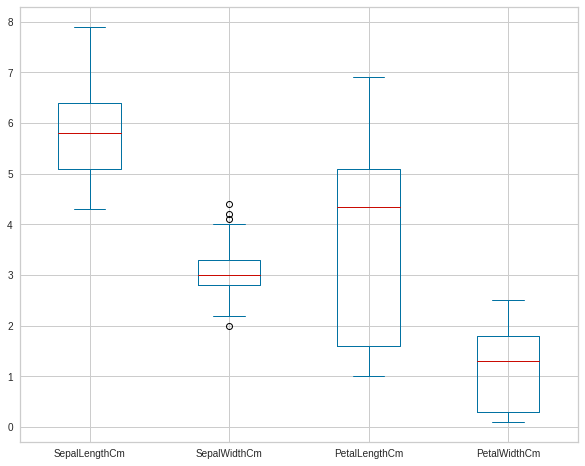

In [85]:
#checking for otliers by boxplot
plt.rcParams["figure.figsize"]=(10,8)
irisdf.plot(kind="box")
plt.show()

In [ ]:
#Only SepalWidth has some outliers. We now remove the outliers s the clusters are very sensitive to outliers and tend to take the clusters tpwards them.

In [86]:
#Removingthe outliers using IQR method
Q1=irisdf.quantile(0.25)
Q3=irisdf.quantile(0.75)
IQR=Q3-Q1
irisdf=irisdf[~((irisdf<(Q1-1.5*IQR)) | (irisdf>(Q3+1.5*IQR))).any(axis=1)]

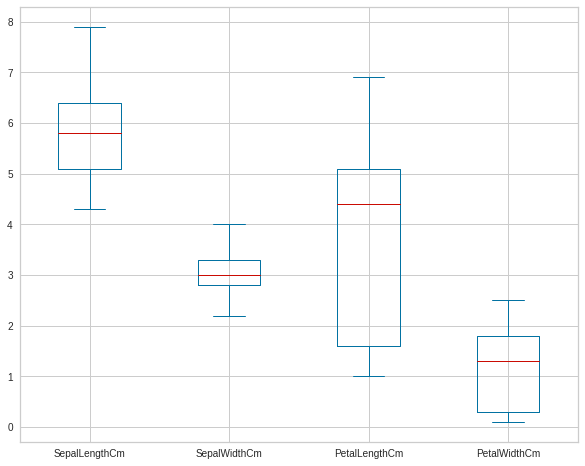

In [87]:
#Plotting the boxplot after revoing the outliers
plt.rcParams["figure.figsize"]=(10,8)
irisdf.plot(kind="box")
plt.show()


#**Step 4) Using the elbow method to find the optimum no. of cluster**
Let us Perform the centroid-based clustering algorithm called  K-Means clustering.Such algorithm are sufficient but sensitive to initial conditions and outliers.
Here we consider two two the Elbow method and the silhoutee score method to decide on the optimum of clusters numbers of clusters(k) to perform the K-Means clustering.  


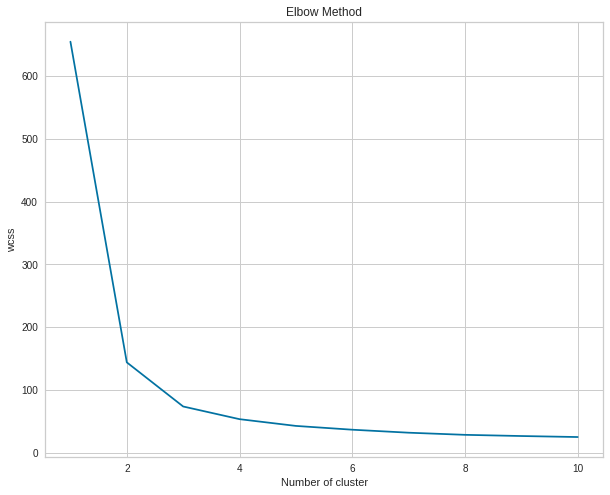

In [88]:
x=irisdf.iloc[:,[0,1,2,3]].values  #Data Arrangement
from sklearn.cluster import KMeans  #create several cluster combination and observe the wcss(within cluster Sum of Squares)
wcss=[] #empty list to store wcss
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',
                 max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)  #fit the model on prepared data
    wcss.append(kmeans.inertia_) #returns wcss for specific value of k
    
# to plot graph
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('wcss')
plt.show()

    

In [ ]:
#Elbow plot is plotted with the value of k on the x-axis and the WCSS(Within Clusters Sum of Squares) on the y-axis. The value of k corresponding to the Elbow point represents the optimal value for k.
#In the above plot, the Elbow point is representated by the arrow and the elbow occurs by 3 points.
#Hence, the Elbow method shows that optimum value for k is 3.

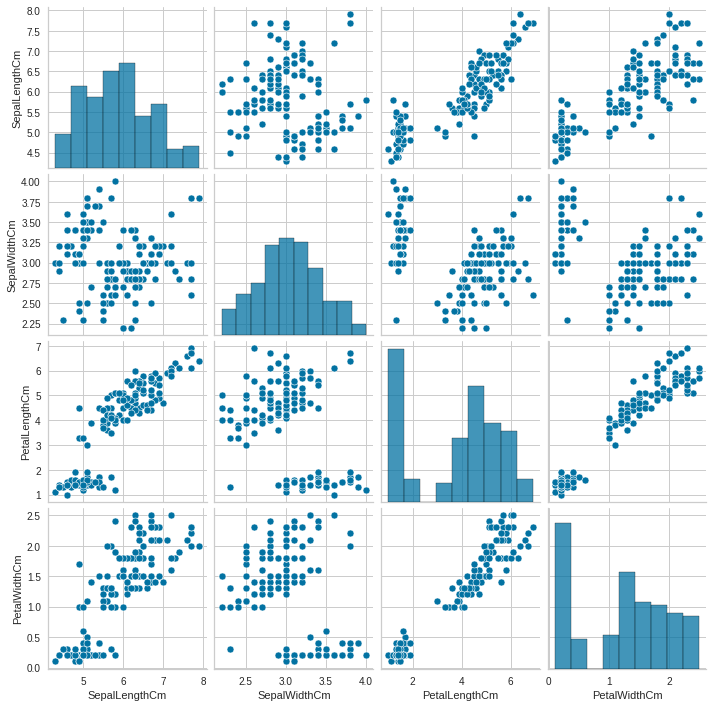

In [89]:
sns.pairplot(irisdf)

#**Step 5) Optimum Value of K using Silhouette plot**

In [90]:
# initialise kmeans
kmeans = [KMeans(n_clusters=k,random_state=42).fit(x) for k in range(2,11)]
s=[silhouette_score(x, model.labels_) 
   for model in kmeans[1:]]

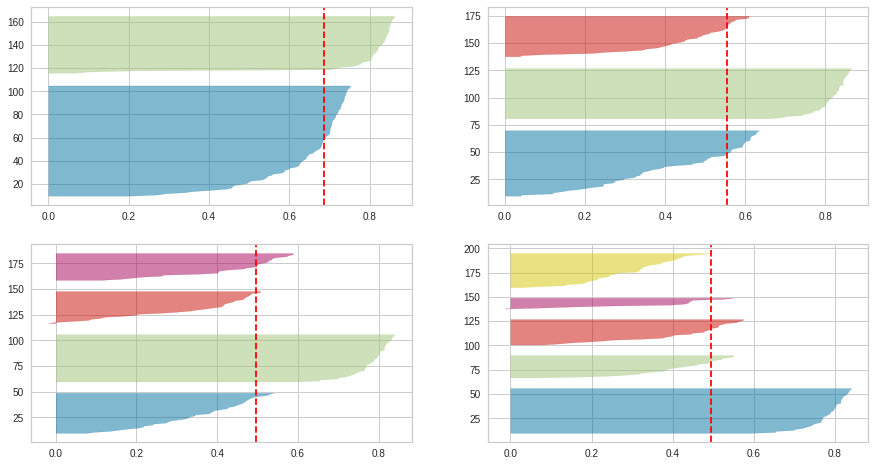

In [91]:
#plotting silhoutte visualiser
from yellowbrick.cluster import SilhouetteVisualizer

fig,ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    
    #Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    km_labels=km.fit_predict(x)
    q, mod = divmod(i, 2)
    
    #Create SilhouetteVisualizer instance with KMeans instance
    #Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)
    

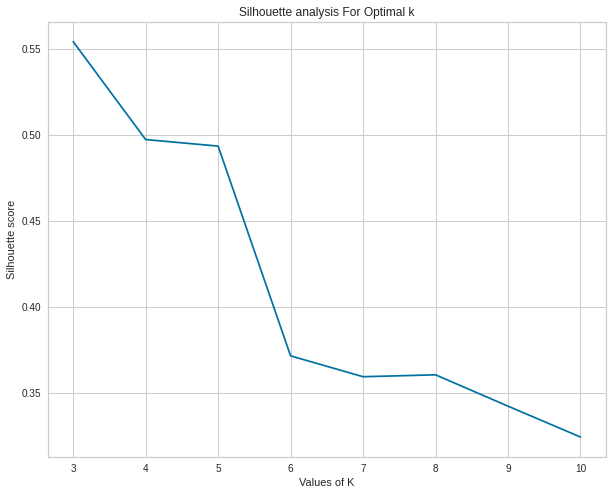

In [92]:
#plotting the silhouette score
plt.plot(range(3,11),s)
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

# **Step 6) Visualization of the clusters**

In [93]:
# Creating the kmeans classifier
kmeans=KMeans(n_clusters=3,init='k-means++',
                  max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)   

y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

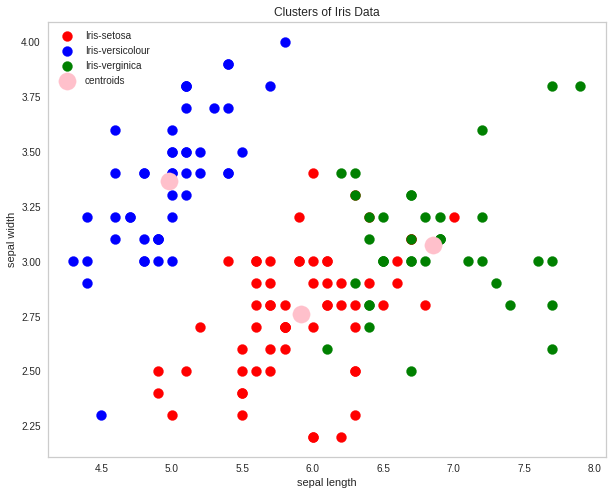

In [95]:
#Visualizing the clusters for the first two columns of the data
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Iris-verginica')

 #plotting the centroid of the cluster
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='pink',label='centroids')
plt.title('Clusters of Iris Data')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.grid()

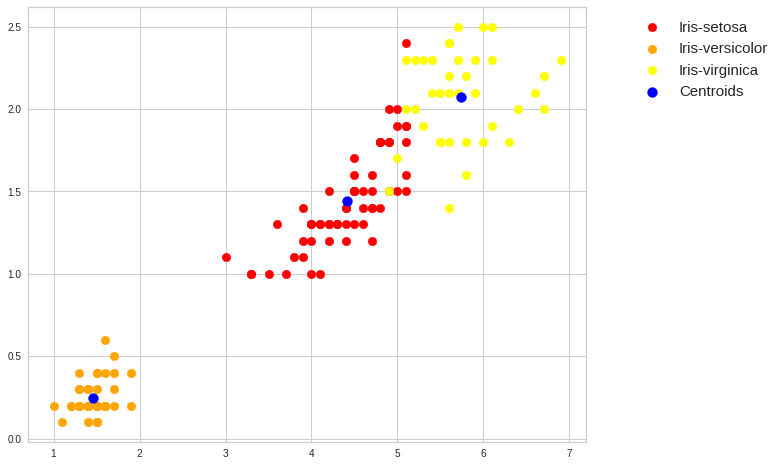

In [96]:
#Visualizing the clusters for the 3rd and 4th columns of the data
plt.scatter(x[ y_kmeans==0,2],x[ y_kmeans==0,3],s=75,c="red",label="Iris-setosa")
plt.scatter(x[ y_kmeans==1,2],x[ y_kmeans==1,3],s=75,c="orange",label="Iris-versicolor")
plt.scatter(x[ y_kmeans==2,2],x[ y_kmeans==2,3],s=75,c="yellow",label="Iris-virginica")
#Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],s=100,c="blue",label="Centroids")
plt.legend(loc=1,bbox_to_anchor=(1.35,1),prop={"size":15})
plt.show()

In [ ]:
#Thus,we have predicted the optimum number of clusters and represented it visually.

# Thank You 